# Esercizio Comuni d'Italia per popolazione

Importo la pagina wikipedia (Comuni d'Italia per popolazione)[https://it.wikipedia.org/wiki/Comuni_d%27Italia_per_popolazione]

In [25]:
# va scaricato lxml e html5lib
import pandas as pd

pop = pd.read_html('https://it.wikipedia.org/wiki/Comuni_d%27Italia_per_popolazione', attrs={"class": "wikitable"}, header=0)[0]

Riordino i dati con le colonne Regione, Provincia, Comune e Abitanti

In [26]:
cols_ordered  = pop[['Regione', 'Provincia / Città metropolitana', 'Comune', 'Abitanti']]

df = cols_ordered.rename(columns={ 'Provincia / Città metropolitana' : 'Provincia' }).sort_values('Regione')

df.head(10)

,Regione,Provincia,Comune,Abitanti
82,Abruzzo,L'Aquila,L'Aquila,69 918
35,Abruzzo,Pescara,Pescara,119 305
122,Abruzzo,Teramo,Teramo,53 199
123,Abruzzo,Pescara,Montesilvano,53 166
89,Basilicata,Potenza,Potenza,64 970
98,Basilicata,Matera,Matera,60 286
85,Calabria,Catanzaro,Lamezia Terme,67 547
58,Calabria,Catanzaro,Catanzaro,85 390
101,Calabria,Crotone,Crotone,59 824
70,Calabria,Cosenza,Corigliano-Rossano,74 765


- Mostrare il numero di comuni per ciascuna regione e ordinarli in ordine alfabetico

In [47]:
n_comuni_regione = df.groupby(['Regione']).size().reset_index(name='Comuni')
n_comuni_regione

,Regione,Comuni
0,Abruzzo,4
1,Basilicata,2
2,Calabria,6
3,Campania,18
4,Emilia-Romagna,13
5,Friuli-Venezia Giulia,3
6,Lazio,11
7,Liguria,4
8,Lombardia,14
9,Marche,3


- Mostrare il numero di comuni per ciascuna Regione e provincia ordinandoli per numero di comuni

In [50]:
n_comuni_regione_provincia = df.groupby(['Regione', 'Provincia']).size().reset_index(name='N. Comuni').sort_values(by=['N. Comuni'], ascending=False)
n_comuni_regione_provincia

,Regione,Provincia,N. Comuni
12,Campania,Napoli,11
28,Lazio,Roma,8
50,Puglia,Barletta-Andria-Trani,4
49,Puglia,Bari,4
38,Lombardia,Milano,4
...,...,...,...
37,Lombardia,Cremona,1
39,Lombardia,Monza e Brianza,1
44,Piemonte,Alessandria,1
45,Piemonte,Asti,1


- Mostrare gli abitanti di ciascuna regione ordinandoli per numero di abitanti in ordine decrescente

In [51]:
from unicodedata import normalize
def map(x):

    if type(x) == str:
        return normalize('NFKC', x).replace(' ', '')
    return x

df['Abitanti'] = df['Abitanti'].map(map).apply(pd.to_numeric)

df['Abitanti'] = df['Abitanti'].apply(pd.to_numeric)
abitanti_regione = df.groupby(['Regione'])['Abitanti'].sum().reset_index(name='N. Abitanti').sort_values(by='N. Abitanti', ascending=False)
abitanti_regione

,Regione,N. Abitanti
6,Lazio,3461069
8,Lombardia,2526169
3,Campania,2079976
13,Sicilia,1935484
4,Emilia-Romagna,1898304
14,Toscana,1459667
11,Puglia,1417282
10,Piemonte,1225010
17,Veneto,915601
7,Liguria,762825


Disegnare un grafico con il numero di comuni di ciascuna regione

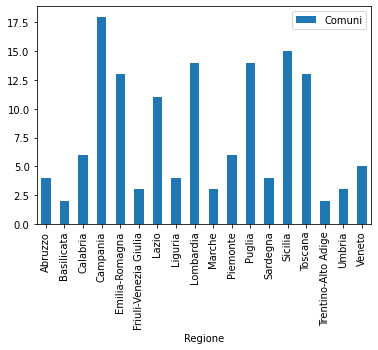

In [63]:
from matplotlib import pyplot


n_comuni_regione.plot('Regione', kind='bar')

pyplot.show()

- Disegnare un grafico con gli abitanti di ciascuna regione

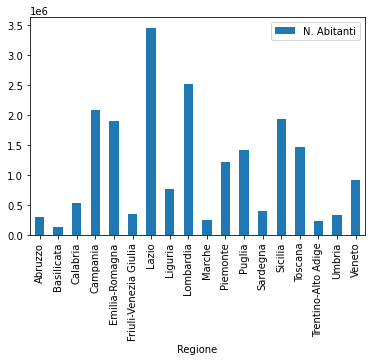

In [65]:
abitanti_regione.sort_values(by='Regione').plot('Regione', kind='bar')

pyplot.show()